[2025-10-03 Fiddler](https://thefiddler.substack.com/p/when-will-you-cross-your-path)
====================

Fiddler
-------
To cross over with the 3 inch line, the path must make an isosceles triangle with a 2 inch
base and and sides of no more than 1 inch, which is when $\varphi = \pi$.

In [1]:
def path(n, phi):
    x = 0
    y = 0
    alpha = 0
    pts = [(x,y)]
    for l in [1..n]:
        x += l*cos(alpha)
        y += l*sin(alpha)
        alpha += phi
        pts.append((x,y))
    l = n/1.9
    return polygon([(l,l),(l,-l),(-l,-l),(-l,l)],
                   fill=false,axes=false,alpha=0.1)+line(pts)

To cross over with the 4 inch line, the path must make an isosceles triangle
with a 3 inch base and sides of no more than 2 inches.  The minimum $\varphi$
is when the sides are 2 inches, so $\cos(\pi-\varphi) = 3/4$.

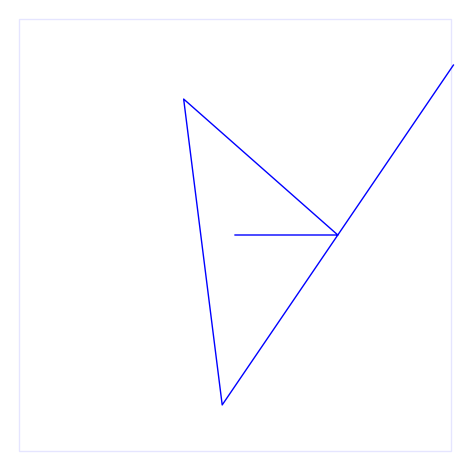

In [2]:
path(4,pi-arccos(3/4))

Graphical exploration suggests that the minimum $\varphi$ for which the 5 inch and
greater lines to intersect the 1 inch line is greater than for the 4 inch line,
but I don't have a proof for that.

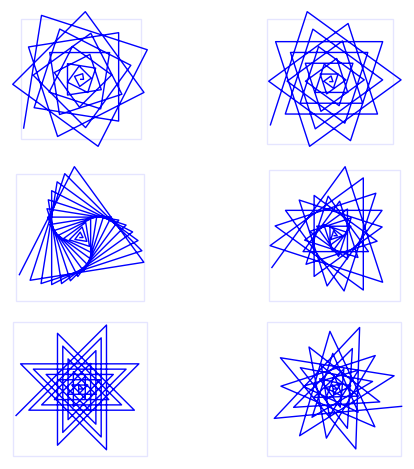

In [3]:
graphics_array([[path(40,0.55*pi),path(40,0.6*pi)],
                [path(40,0.65*pi),path(40,0.7*pi)],
                [path(40,0.75*pi),path(40,0.77*pi)]])

Assuming that the minimum $\varphi$ for the lines longer than the 4 inch line
is greater than the minimum $\varphi$ for the 4 inch line, the answer is 4 and
the extra credit answer is $\pi-\arccos(3/4) \approx 138.6\degree$.

In [4]:
numerical_approx((pi - arccos(3/4))*180/pi)

138.590377890729

Initial thoughts
----------------
Given $\varphi$, the distance from the origin to the start of the $n$ inch segment, and
the minimum distance from the origin to the $n$ segment line, it should be possible to
calculate the distance from the origin to the start of the $n+1$ inch segment and the
minimum distance from the origin to the $n+1$ inch segment.

Let $a_n$ be the distance from the origin to the start of the $n$ inch segment, and let
$b_n \le a_n$ be the minimum distance from the origin to the $n$ inch segment.

Then, $c_n = \sqrt{a_n^2-b_n^2}$ is the distance from the start of the segment to the
point on the segment closest to the origin, and
$a_{n+1} = \sqrt{b_n^2 + (n-c_n)^2} = \sqrt{a_n^2+n^2-2n\sqrt{a_n^2-b_n^2}}$.

Working through the trigonometry, assuming $\varphi > \pi/2$,
$b_{n+1} = a_{n+1} \sin(\varphi + \arcsin(b_n/a_{n+1}))$.

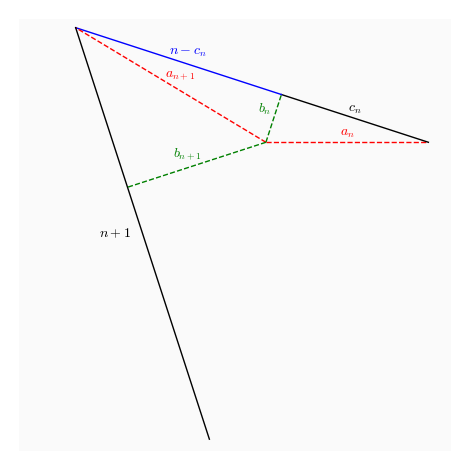

In [5]:
phi = 0.7*pi
n = 6
a = 2.62865556
b = 0.81229924
c = sqrt(a^2-b^2)
a1 = sqrt(b^2+(n-c)^2)
b1 = a1*sin(phi + arcsin(b/a1))
c1 = sqrt(a1^2-b1^2)
d = 0.15
(line([(0,0),(a,0)],color='red',linestyle='dashed',axes=false)
 + text('$a_n$',(a/2,0+d),color='red')
 + line([(0,0),(b*cos(acos(b/a)),b*sin(acos(b/a)))],color='green',linestyle='dashed')
 + text('$b_n$',(b*cos(acos(b/a))/2-d,b*sin(acos(b/a))/2+d),color='green')
 + line([(a,0),(a-c*cos(acos(c/a)),c*sin(acos(c/a)))],color='black')
 + text('$c_n$',(a-c*cos(acos(c/a))/2,c*sin(acos(c/a))/2+d),color='black')
 + line([(a-c*cos(acos(c/a)),c*sin(acos(c/a))),(a-n*cos(acos(c/a)),n*sin(acos(c/a)))],color='blue')
 + text('$n-c_n$',(a-(n/2+c/2)*cos(acos(c/a))+d,(n/2+c/2)*sin(acos(c/a))+d),color='blue')
 + line([(0,0),(a-n*cos(acos(c/a)),n*sin(acos(c/a)))],color='red',linestyle='dashed')
 + text('$a_{n+1}$',((a-n*cos(acos(c/a)))/2+d,n*sin(acos(c/a))/2+d),color='red')
 + line([(a-n*cos(acos(c/a)),n*sin(acos(c/a))),
         (a-n*cos(acos(c/a))-(n+1)*cos(phi-acos(c/a)),
          n*sin(acos(c/a))-(n+1)*sin(phi-acos(c/a)))],color='black')
 + text('$n+1$',
        (a-n*cos(acos(c/a))-(n+1)*cos(phi-acos(c/a))/2-3*d,
         n*sin(acos(c/a))-(n+1)*sin(phi-acos(c/a))/2),color='black')
 + line([(0,0),
         (a-n*cos(acos(c/a))-c1*cos(phi-acos(c/a)),
          n*sin(acos(c/a))-c1*sin(phi-acos(c/a)))],
        color='green',linestyle='dashed')
 + text('$b_{n+1}$',
        ((a-n*cos(acos(c/a))-c1*cos(phi-acos(c/a)))/2-d,
         (n*sin(acos(c/a))-c1*sin(phi-acos(c/a)))/2+d),color='green')
 + polygon([(-4,-5),(3,-5),(3,2),(-4,2)],alpha=0.02,color='black')
)

### Partial proof
Plotting the minimum distance between the origin and the $n$ inch segment
for $\pi/2 \le \varphi \le \pi$ for $n \in 1\ldots 8$.  The computation
becomes too slow for $n > 8$.

In [6]:
def abn():
    n = 1
    a = 0
    b = 0
    phi = var('phi')
    while True:
        yield(a,b,n)
        a = sqrt(a^2 + n^2 - 2*n*sqrt(a^2-b^2))
        b = a*sin(phi+arcsin(b/a))
        n = n+1

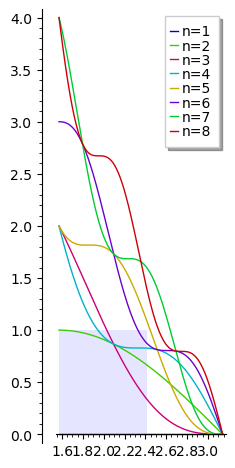

In [7]:
bs = []
for (a,b,n) in abn():
    bs.append(b)
    if n >= 8:
        break
(plot(bs,pi/2,pi,legend_label=["n=1","n=2","n=3","n=4","n=5","n=6","n=7","n=8"])
 + polygon([(pi/2,0),(pi/2,1),(pi-arccos(3/4),1),(pi-arccos(3/4),0)],alpha=0.1)
)

The shaded area is where $\varphi \le \pi-\arccos(3/4)$ and the distance to the
origin is less than or equal to 1.

The calculation becomes too slow for $n > 8$.

When $n = 5$ or $n > 6$, the segments never get close enough to the origin unless $\varphi$
is greater than $\pi-\arccos(3/4)$.

For $n = 6$, the following plots should make it clear that for the portion of the
curve within the shaded area, the 6 inch segment does not intersect the 1 inch segment.

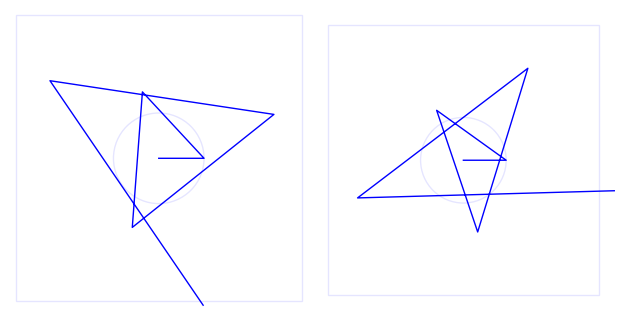

In [8]:
graphics_array([path(6,pi-arccos(3/4)-0.1)+circle((0,0),1,alpha=0.1),
                path(6,pi-arccos(3/4)+0.1)+circle((0,0),1,alpha=0.1)])

This should prove that for $n < 9$, the minimum $\varphi$ is $\pi-\arccos(3/4)$.

It also seems to likely to me that it should hold for $n \ge 9$.

Another approach
----------------
Represent the position as a complex number.  If $p_n$ is the end of the $n$ inch segment,
$p_{n+1} = p_n + (n+1)e^{in\varphi}$.  Since $p_1 = 1$, $p_n = \sum_{k=1}^n ke^{i(k-1)\varphi}$.

In [9]:
k,n,phi = var("k,n,phi")
assume(k,"integer")
assume(n,"integer")
assume(phi,"real")
assume(n > 0)
assume(phi > pi/2)
assume(phi < pi)
p(phi,n) = sum(k*e^(i*(k-1)*phi), k, 1, n)

Then, the origin, $p_{n-1}$, and $p_n$ form a triangle with lengths
$|p_{n-1}|$, $|p_n|$, and $n$, which can be used to find the minimum
distance between the $n$ inch segment and the origin.

In [10]:
a(phi,n) = abs(p(phi,n-1))
x,y = var("x,y")
b(phi,n) = solve([x^2+y^2 == a(phi,n+1)^2, (n-x)^2+y^2 == a(phi,n)^2],[x,y])[1][1].rhs()

This reproduces the previous plot.

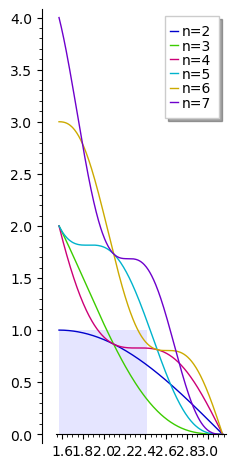

In [11]:
(plot([b(phi,k) for k in [2..7]],pi/2,pi,legend_label=[f"n={k}" for k in [2..7]])
 + polygon([(pi/2,0),(pi/2,1),(pi-arccos(3/4),1),(pi-arccos(3/4),0)],alpha=0.1)
)

We can see that for $6 < n \le 25$, the minimum distance of the $n$ inch
segment to the origin is greater than 1 for $\varphi < \pi-\arccos(3/4)$.

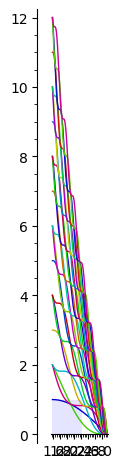

In [12]:
(plot([b(phi,k) for k in [2..25]],pi/2,pi)
 + polygon([(pi/2,0),(pi/2,1),(pi-arccos(3/4),1),(pi-arccos(3/4),0)],alpha=0.1)
)

But it's beyond the computer's capabilities to find an analytic solution for $\varphi$
when the minimum distance is 1.

In [13]:
solve(b(phi,n) == 1, phi)

[abs(e^(2*I*phi) - 2*e^(I*phi) + 1) == -sqrt(1/2)*sqrt(sqrt(-n^4*abs(e^(2*I*phi) - 2*e^(I*phi) + 1)^4 + 2*n^2*abs(((n - 1)*e^(I*phi) - n)*e^(I*n*phi) + e^(I*phi))^2*abs(e^(2*I*phi) - 2*e^(I*phi) + 1)^2 - abs(((n - 1)*e^(I*phi) - n)*e^(I*n*phi) + e^(I*phi))^4 - abs((n*e^(I*phi) - n - 1)*e^(I*n*phi) + 1)^4 + 2*(n^2*abs(e^(2*I*phi) - 2*e^(I*phi) + 1)^2 + abs(((n - 1)*e^(I*phi) - n)*e^(I*n*phi) + e^(I*phi))^2)*abs((n*e^(I*phi) - n - 1)*e^(I*n*phi) + 1)^2)/n), abs(e^(2*I*phi) - 2*e^(I*phi) + 1) == sqrt(1/2)*sqrt(sqrt(-n^4*abs(e^(2*I*phi) - 2*e^(I*phi) + 1)^4 + 2*n^2*abs(((n - 1)*e^(I*phi) - n)*e^(I*n*phi) + e^(I*phi))^2*abs(e^(2*I*phi) - 2*e^(I*phi) + 1)^2 - abs(((n - 1)*e^(I*phi) - n)*e^(I*n*phi) + e^(I*phi))^4 - abs((n*e^(I*phi) - n - 1)*e^(I*n*phi) + 1)^4 + 2*(n^2*abs(e^(2*I*phi) - 2*e^(I*phi) + 1)^2 + abs(((n - 1)*e^(I*phi) - n)*e^(I*n*phi) + e^(I*phi))^2)*abs((n*e^(I*phi) - n - 1)*e^(I*n*phi) + 1)^2)/n)]

In [14]:
solve(b(phi,1)^2 == 1, phi)

[]

Numerically finding $\varphi$ for which the minimum distance is 1 versus $n$
makes convincing case that that $\varphi$ approaches $\pi$ as $n$ increases.
It's no proof, as the numerical root finder does not necessarily rule out a
solution between $\pi/2$ and $\pi-\arccos(3/4)$.  Also, this graph only goes
up to to $n = 100$.

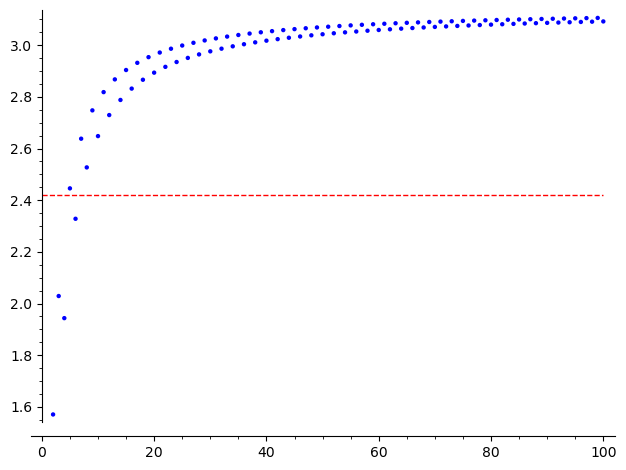

In [15]:
(points([(k,find_root(b(phi,k) - 1, pi/2, pi)) for k in [2..100]])
 + line([(0,pi-arccos(3/4)),(100,pi-arccos(3/4))],linestyle='dashed',color='red')
)